<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Obtaining a dataset

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Dataset obtaining.
url = "https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv"
df_train = pd.read_csv(url)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

[Problem 2] Investigating the dataset itself

The Ames Housing dataset was compiled by Dean De Cock for use in data science education used for predicting house prices in Ames, Iowa.

The dataset contains 79 different features that describe nearly every aspect of residential homes in Ames, Iowa:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

The goal is to learn a relationship between these important features and the house prices, and use it to predict the prices of a new set of houses.

This involves various steps such as exploratory data analysis, cleaning and preprocessing of data, feature engineering, and finally fitting different models on the cleaned data to predict the house price.

---

[Problem 3] Checking the data

In [ ]:
features = df_train.columns.drop('SalePrice')
target = 'SalePrice'

# features checking
df_train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# features checking
df_train[features].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


*This dataset contain both numerical (float64, int64) and textual/categorical (object) features.*

In [ ]:
# check target variable
df_train[target]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
# mean, standard deviation, and quartiles of the feature values displaying
df_train[features].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


---

[Problem 4] Dealing with missing values

Check for missing values for each feature.

<Axes: >

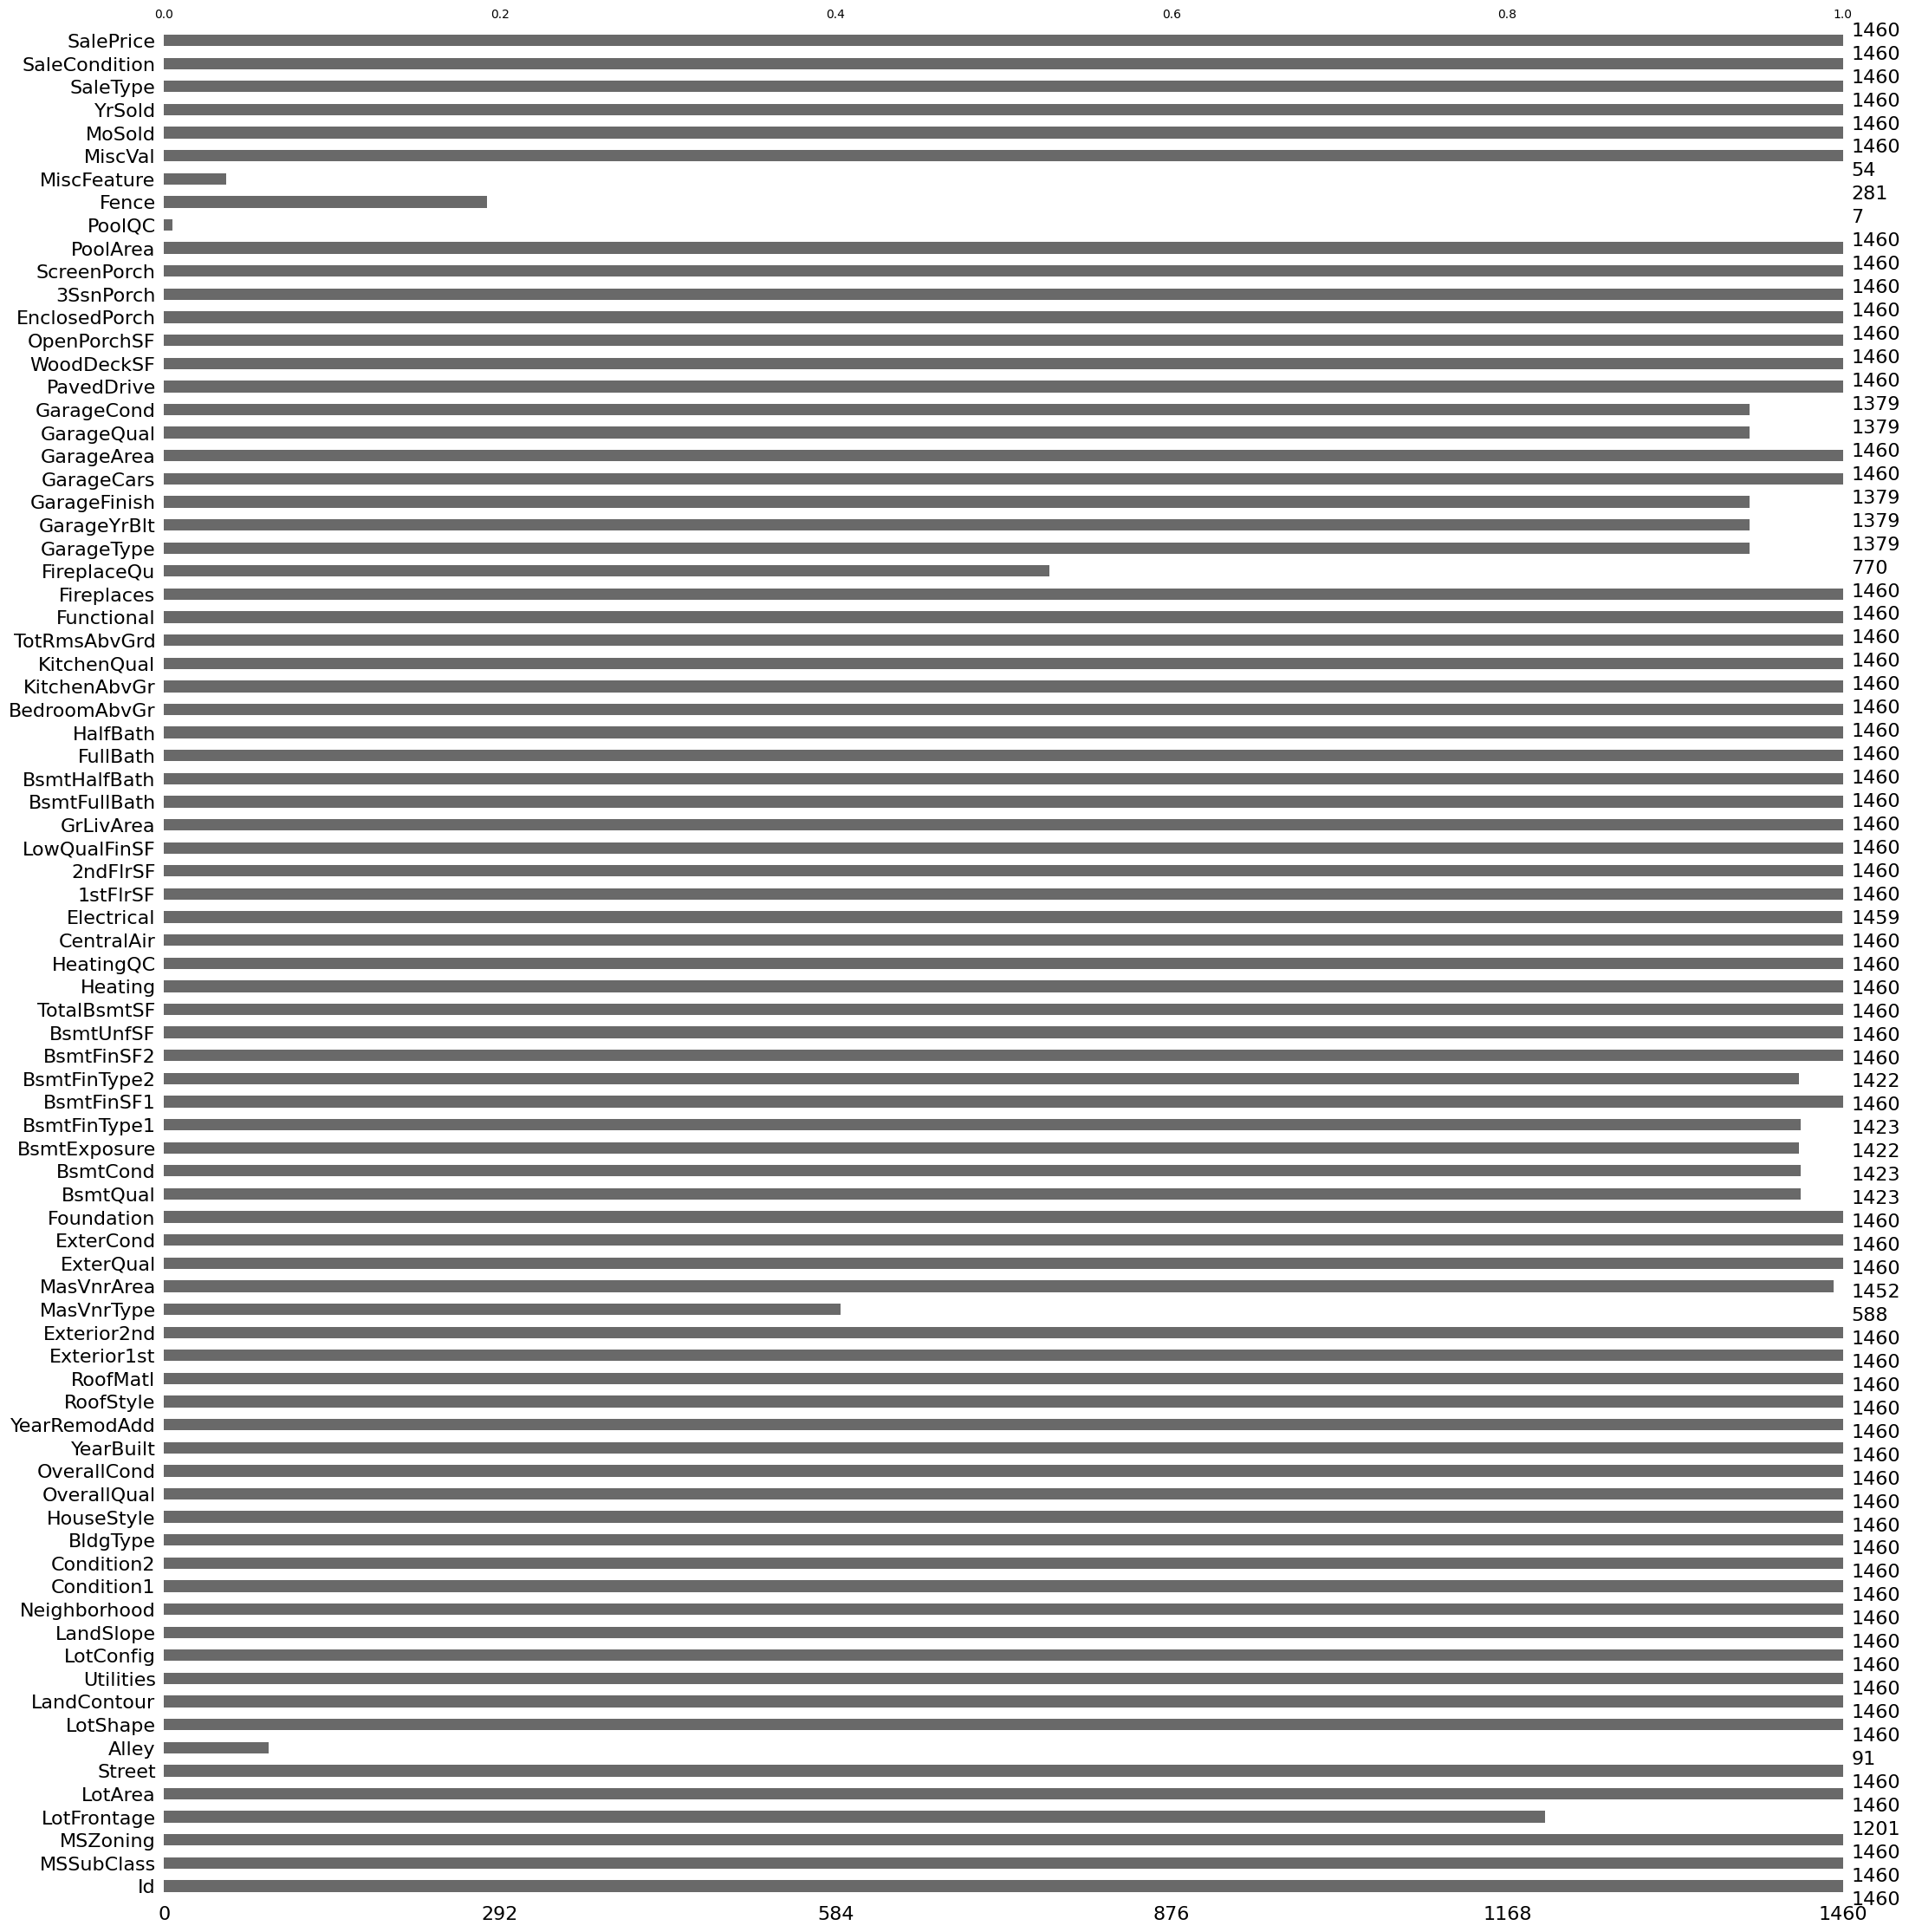

In [ ]:
msno.bar(df_train)

Check the percentage of missing values.


In [ ]:
total_missing_values = df_train[features].isna().sum().sort_values(ascending=False)
missing_ratio = total_missing_values/ len(df_train)
missing_values_stat = pd.DataFrame({
    "total_missing_values" : total_missing_values,
    "missing_ratio" : missing_ratio
})
missing_values_stat

,total_missing_values,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
TotalBsmtSF,0,0.000000
Heating,0,0.000000
MSSubClass,0,0.000000
CentralAir,0,0.000000


Delete features (columns) that have 5 or more missing values.

In [ ]:
df_train = df_train.dropna(thresh=len(df_train)-5, axis=1)
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Delete samples (rows) with missing values from the data from which features with 5 or more missing values have been deleted.


<Axes: >

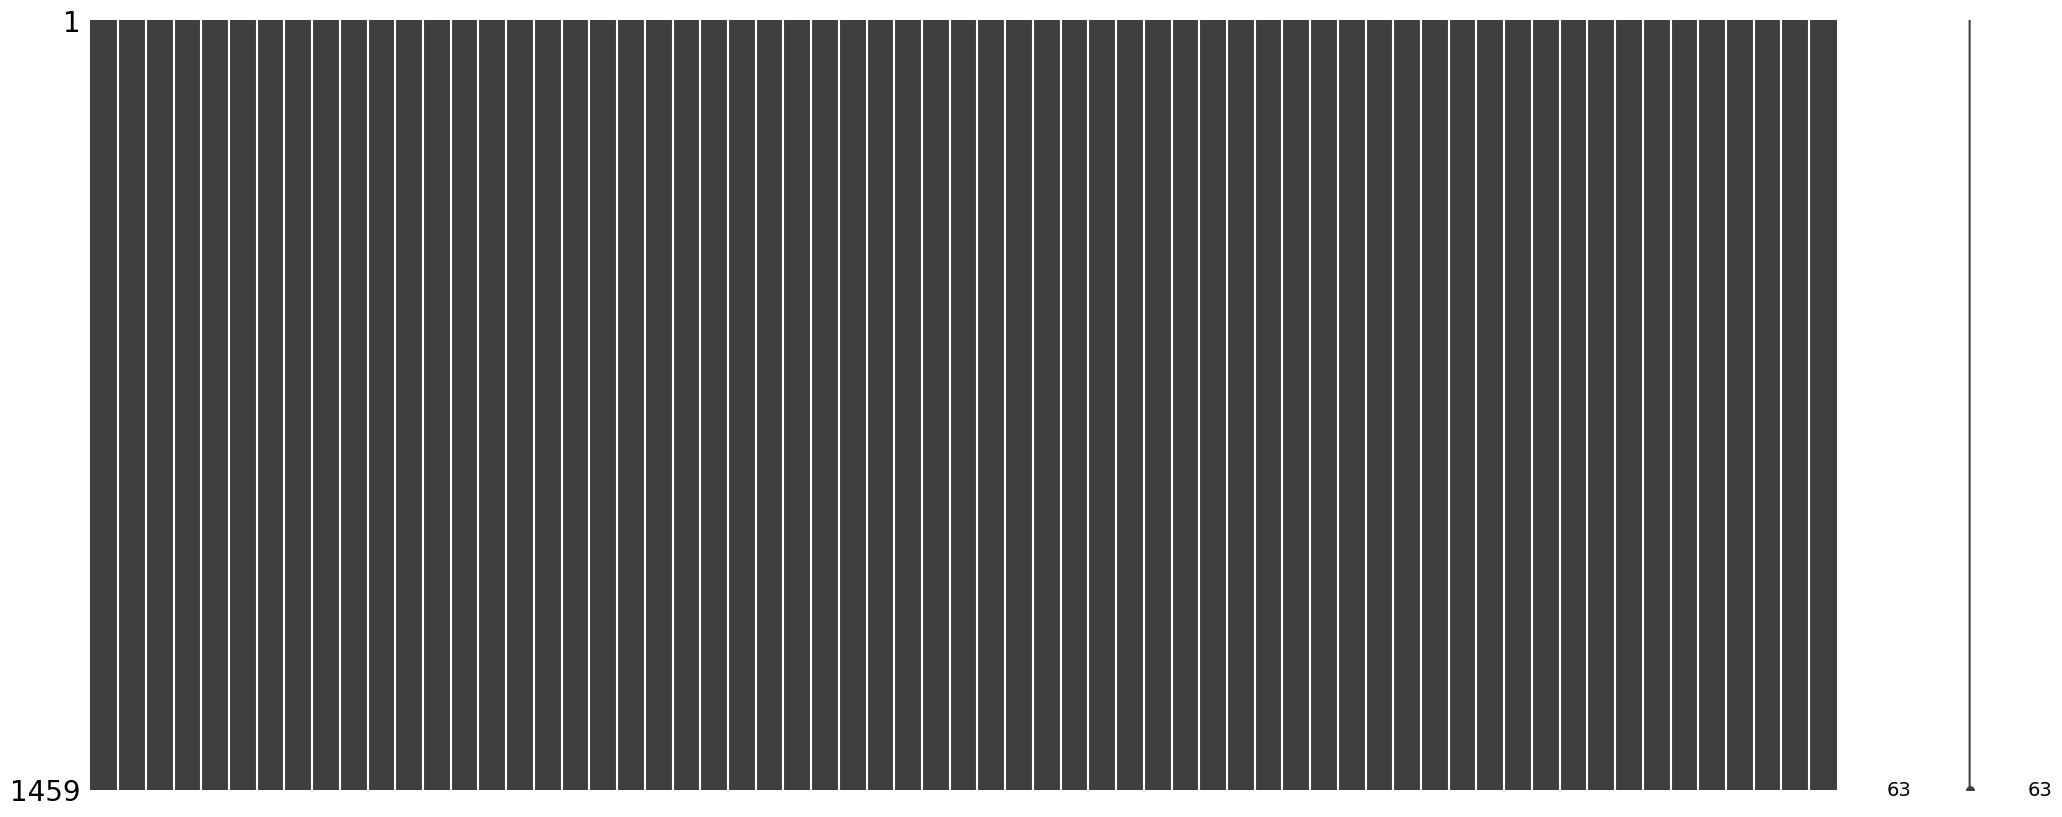

In [ ]:
df_train = df_train.dropna()
msno.matrix(df_train)

*Great! Our data looks cleaned right now.*

---

[Problem 5] Researching terminology

In a perfect normal distribution, the tails are equal in length. But, when there is asymmetry between the tails, giving it a leaned, squished-to-one-side look, we say it is skewed. And you guessed it, **we measure the extent of this asymmetry with skewness**.

There are three types of skewness: positive, negative, and zero skewness.

A distribution with zero skewness has the following characteristics:

- Symmetric distribution with values evenly centered around the mean.
- No skew, lean or tail to either side.
- The mean, median, and mode are all at the center point.


In practice, mean, median, and mode may not form a perfect overlapping straight line. They may be slightly away from each other but the difference would be too small to matter.

In a distribution with positive skewness (right-skewed):

- The right tail of the distribution is longer or fatter than the left.
- The mean is greater than the median, and the mode is less than both mean and median.
- Lower values are clustered in the “hill” of the distribution, while extreme values are in the long right tail.
- It is also known as right-skewed distribution.


In a distribution with negative skewness (left-skewed):

- The left tail of the distribution is longer or fatter than the right.
- The mean is less than the median, and the mode is greater than both mean and median.
- Higher values are clustered in the “hill” of the distribution, while extreme values are in the long left tail.
- It is also known as left-skewed distribution.

You can use built-in methods from `pandas` or `scipy` to calculate it:

```python
# Pandas version
df.skew()

# SciPy version
from scipy.stats import skew

skew(df)
```

Once you calculate skewness, you can categorize the extent of the skew:

- (-0.5, 0.5) — low or approximately symmetric.
- (-1, -0.5) U (0.5, 1) — moderately skewed.
- Beyond -1 and 1 — Highly skewed.

While skewness focuses on the spread (tails) of normal distribution, **kurtosis** focuses more on the height. **It tells us how peaked or flat our normal (or normal-like) distribution is**. The term, which means curved or arched from Greek, was first coined by, unsurprisingly, from the British mathematician Karl Pearson (he spent his life studying probability distributions).

High kurtosis indicates:

- Sharp peakedness in the distribution’s center.
- More values concentrated around the mean than normal distribution.
- Heavier tails because of a higher concentration of extreme values or outliers in tails.
- Greater likelihood of extreme events.

On the other hand, low kurtosis indicates:

- Flat peak.
- Fewer values concentrated around the mean but still more than normal distribution.
- Lighter tails.
- Lower likelihood of extreme events.

Depending on the degree, distributions have three types of kurtosis:

1. **Mesokurtic distribution** (kurtosis = 3, excess kurtosis = 0): perfect normal distribution or very close to it.
2. **Leptokurtic distribution** (kurtosis > 3, excess kurtosis > 0): sharp peak, heavy tails
3. **Platykurtic distribution** (kurtosis < 3, excess kurtosis < 0): flat peak, light tails

Note that here, **excess kurtosis** is defined as kurtosis - 3, treating the kurtosis of normal distribution as 0. This way, kurtosis scores are more interpretable.

You can calculate kurtosis in Python in the same way as skewness using pandas or SciPy:

```python
from scipy.stats import kurtosis

kurtosis(df)

```

Pandas offers two functions for kurtosis: `kurt` and `kurtosis`. The first one is exclusive to Pandas Series, while you can use the other on DataFrames.

```python
sr.kurt()

# Select numeric features and calculate kurtosis
df.select_dtypes(include="number").kurtosis()
```

---

[Problem 6] Confirming distribution

Use seaborn's sns.displot() and sns.histplot() to display the distribution of objective variables

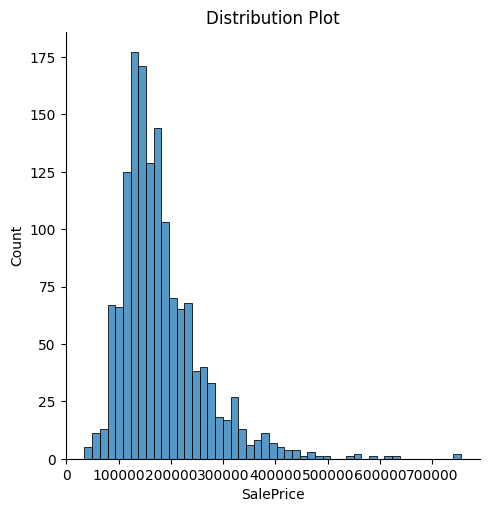

In [ ]:
# Display distribution using displot
sns.displot(df_train[target])
plt.title('Distribution Plot')
plt.show()

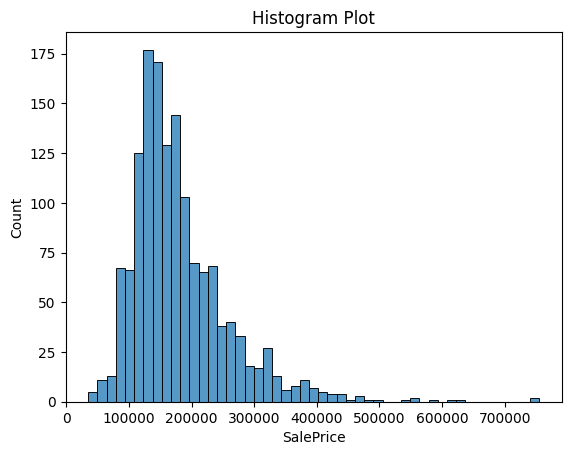

In [ ]:
# Display distribution using histplot
sns.histplot(df_train[target])
plt.title('Histogram Plot')
plt.show()

In [ ]:
# Calculate and print kurtosis and skewness
kurtosis = df_train[target].kurt()
skewness = df_train[target].skew()
print(f'Kurtosis: {kurtosis}')
print(f'Skewness: {skewness}')

Kurtosis: 6.529263049673958
Skewness: 1.8819429948035529


Perform a logarithmic transformation on the objective variable.

In [ ]:
# Perform logarithmic transformation
df_train[target] = np.log1p(df_train[target])

<ipython-input-59-e46a9f8eb6f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[target] = np.log1p(df_train[target])


Display the distribution for the logarithmically transformed one, and calculate the "kurtosis" and "skewness".

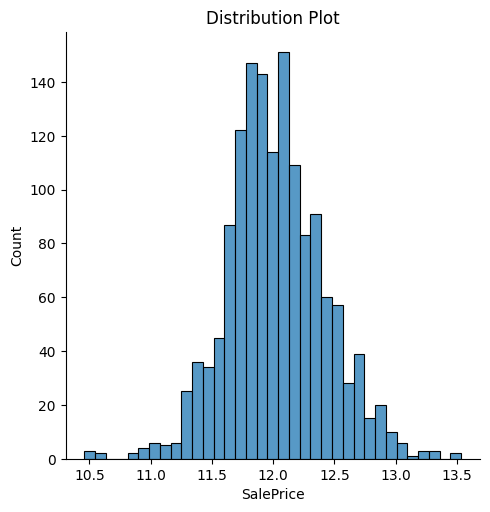

In [ ]:
# Display distribution using displot
sns.displot(df_train[target])
plt.title('Distribution Plot')
plt.show()

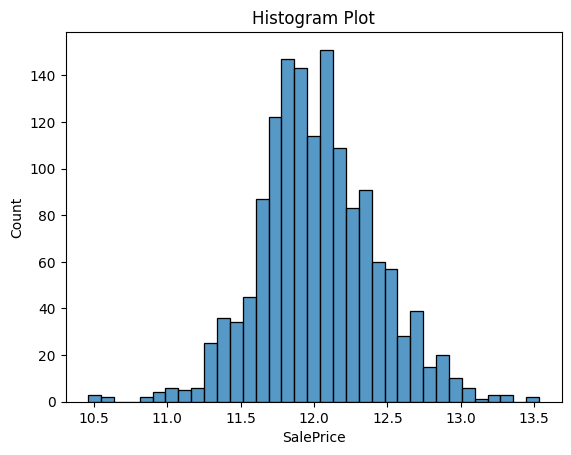

In [ ]:
# Display distribution using histplot
sns.histplot(df_train[target])
plt.title('Histogram Plot')
plt.show()

In [ ]:
# Calculate and print kurtosis and skewness after the transformation.
kurtosis = df_train[target].kurt()
skewness = df_train[target].skew()
print(f'Kurtosis: {kurtosis}')
print(f'Skewness: {skewness}')

Kurtosis: 0.8069150159777285
Skewness: 0.12132931002199303


*The logarithmic transformation has normalized the right-skewed distribution of the objective variable, resulting in a more symmetric, bell-shaped curve that aligns with the normal distribution, enhancing the potential for accurate predictions.*

---

[Problem 7] Confirming the correlation coefficient

Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.

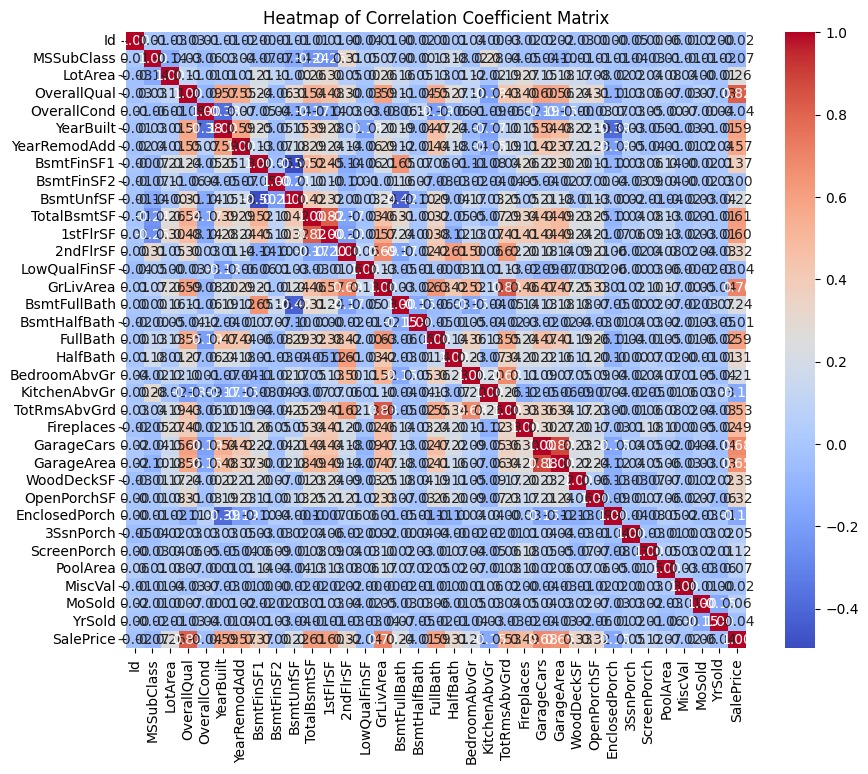

In [ ]:
# Update features
features = df_train.columns.drop('SalePrice')

# Calculate the correlation matrix for numeric features only
corr_matrix = df_train.select_dtypes(include=['int64', 'float64']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Correlation Coefficient Matrix")
plt.show()

In [ ]:
# Create a mask to only show the lower triangle of the matrix, as the upper triangle is a mirror image
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_matrix_masked = corr_matrix.mask(mask)

# Find relationships with high correlation coefficients
high_corr = corr_matrix_masked[corr_matrix_masked.abs() > 0.75]
high_corr_pairs = high_corr.stack().sort_values(ascending=False).drop_duplicates()
print(high_corr_pairs)


GarageArea    GarageCars     0.882613
TotRmsAbvGrd  GrLivArea      0.825576
1stFlrSF      TotalBsmtSF    0.819393
SalePrice     OverallQual    0.817368
dtype: float64


Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.

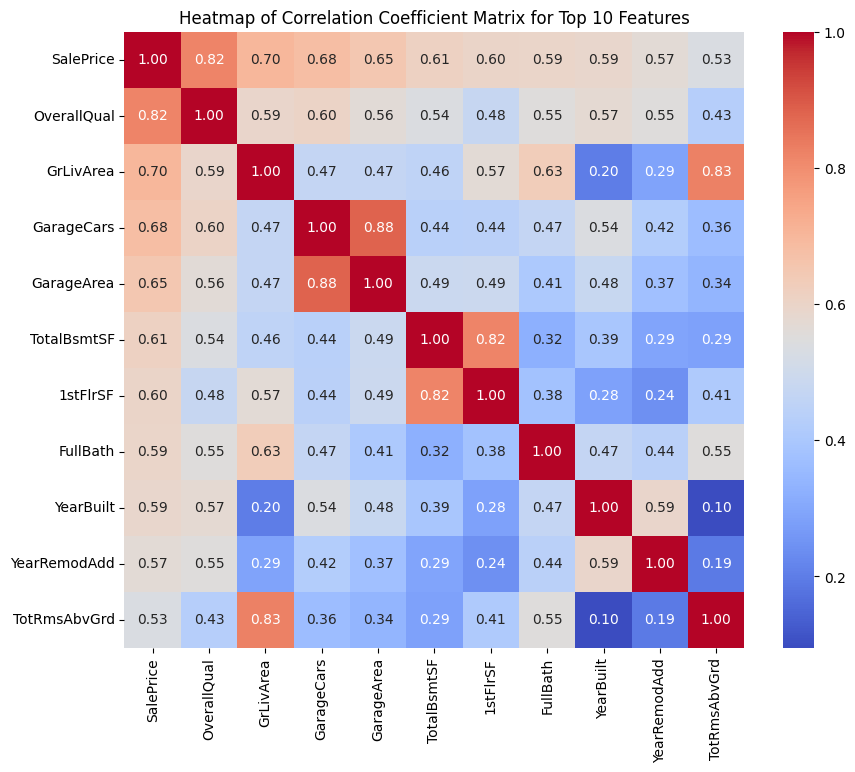

In [ ]:
# Calculate the correlation of all features with the target variable
correlation_with_target = df_train.select_dtypes(include=['int64', 'float64']).corr()[target]

# Select the top 10 features that have the highest correlation with the target variable
top_10_features = correlation_with_target.abs().nlargest(11).index  # 11 because the target variable is included

# Calculate the correlation matrix for the top 10 features
top_10_corr_matrix = df_train[top_10_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Correlation Coefficient Matrix for Top 10 Features")
plt.show()

Features description.

- **OverallQual**: Overall material and finish quality
- **GrLivArea**: Above grade (ground) living area square feet
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **TotalBsmtSF**: Total square feet of basement area
- **1stFlrSF**: First Floor square feet
- **FullBath**: Full bathrooms above grade
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.

In [ ]:
# Create a mask to only show the lower triangle of the matrix, as the upper triangle is a mirror image
mask = np.triu(np.ones_like(top_10_corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
top_10_corr_matrix_masked = top_10_corr_matrix.mask(mask)

# Find relationships with high correlation coefficients
high_corr = top_10_corr_matrix_masked[abs(top_10_corr_matrix_masked) > 0.8].stack()

# Sort the pairs by correlation coefficient
high_corr_sorted = high_corr.sort_values(kind="quicksort")

# Print the top 3 pairs
print(high_corr_sorted[-3:])

1stFlrSF      TotalBsmtSF    0.819393
TotRmsAbvGrd  GrLivArea      0.825576
GarageArea    GarageCars     0.882613
dtype: float64
